# TEST

Dummy notebook to test functions

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

## Test prepData

Import data from example run and prepare it for further analysis.

In [2]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


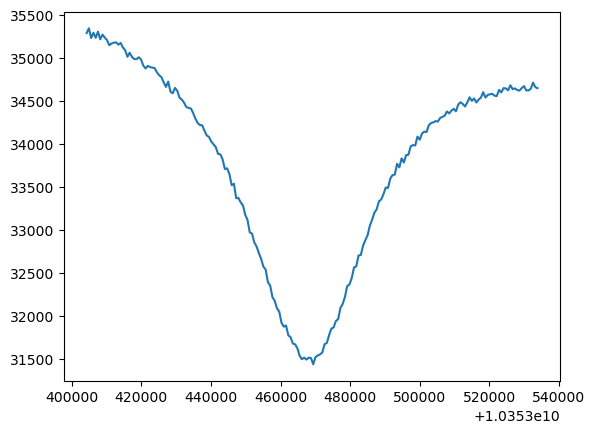

In [3]:
plt.plot(freq, fft)

## Test Fits

### Background Fit

First fit background and check the distribution of residuals.

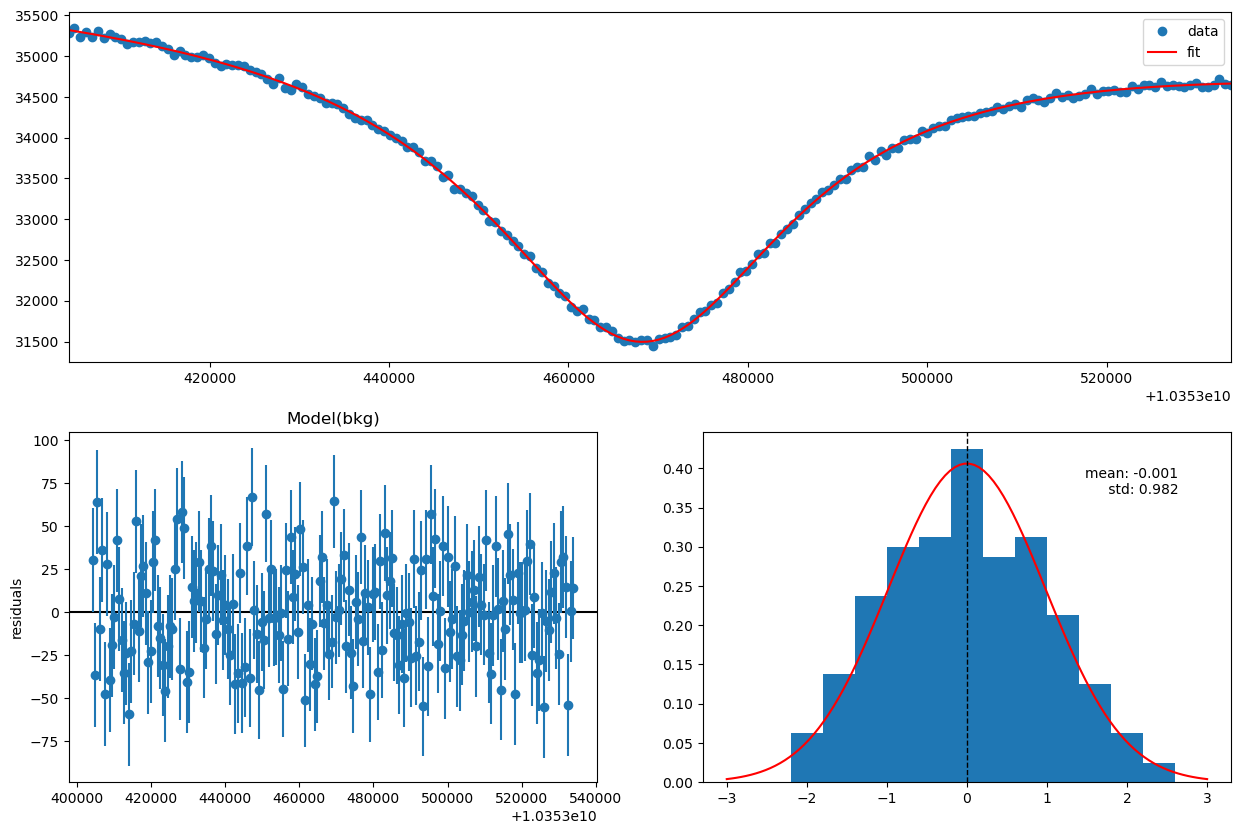

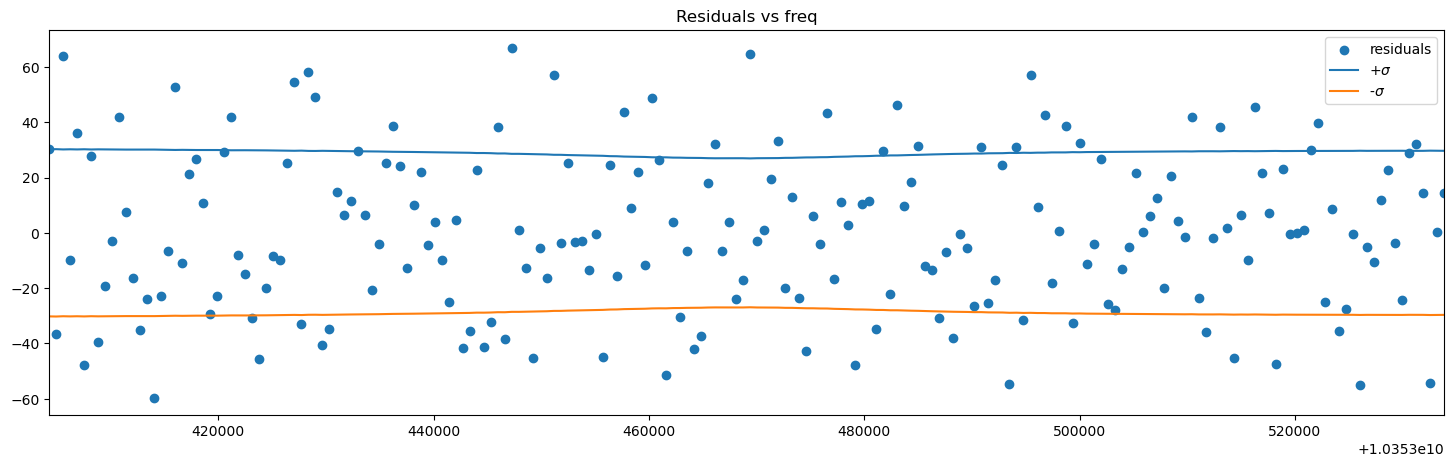

In [4]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### Signal FIt

Fit signal function using every possible frequency as the centre of the signal and check the values of $\mu$ obtained. 

In [5]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]

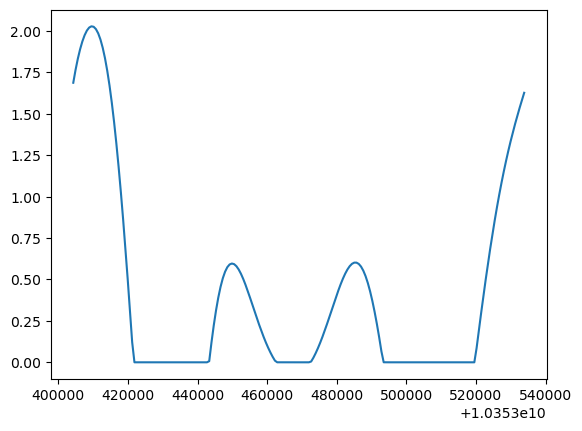

In [6]:
plt.plot(freq, mu_fit)

Check fit results for maximum $\mu$ obtained.

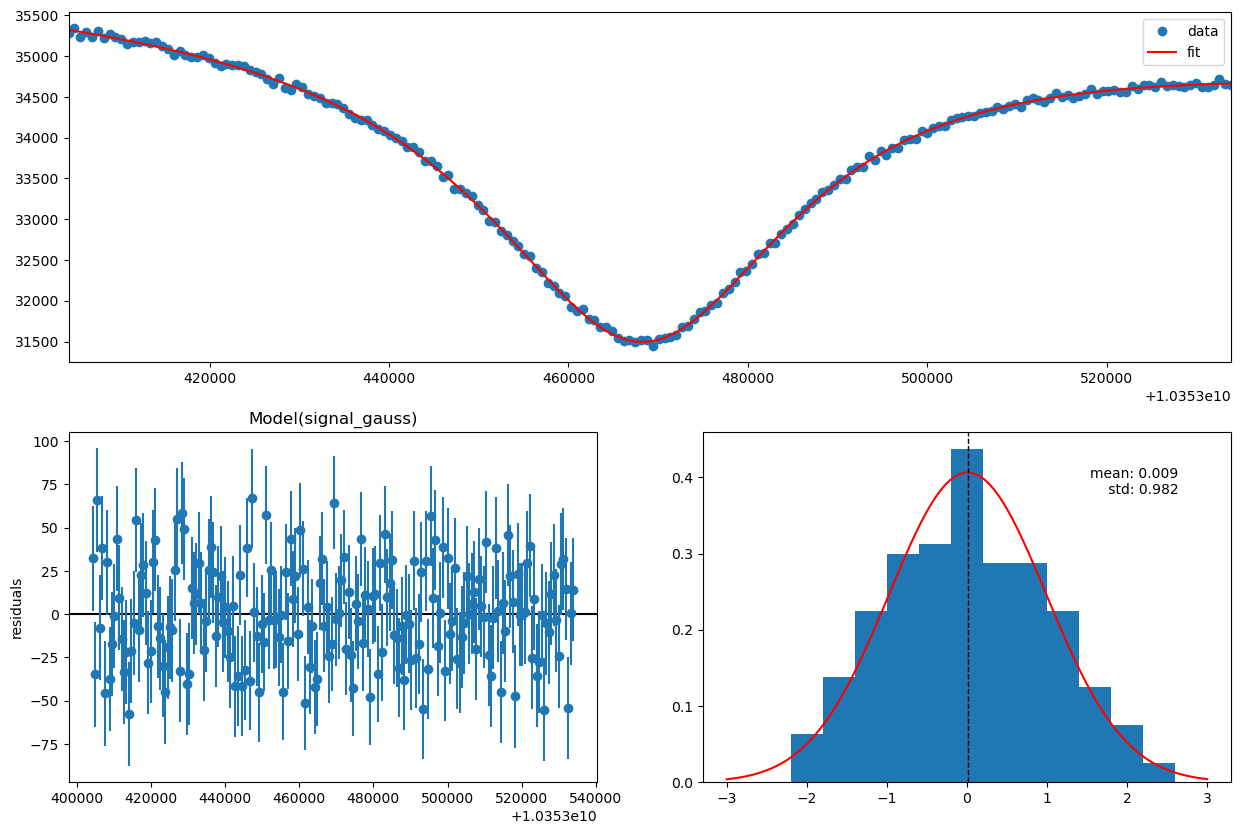

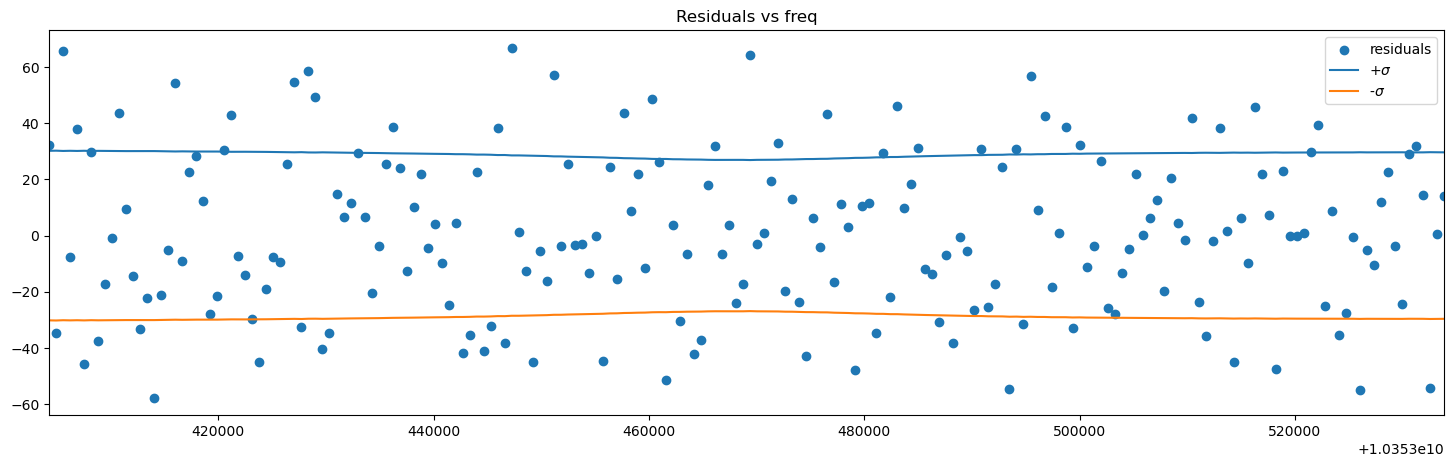

In [9]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

If you let every parameter vary, the fit does not converge for $\mu$ and it gets stuck on the starting value.

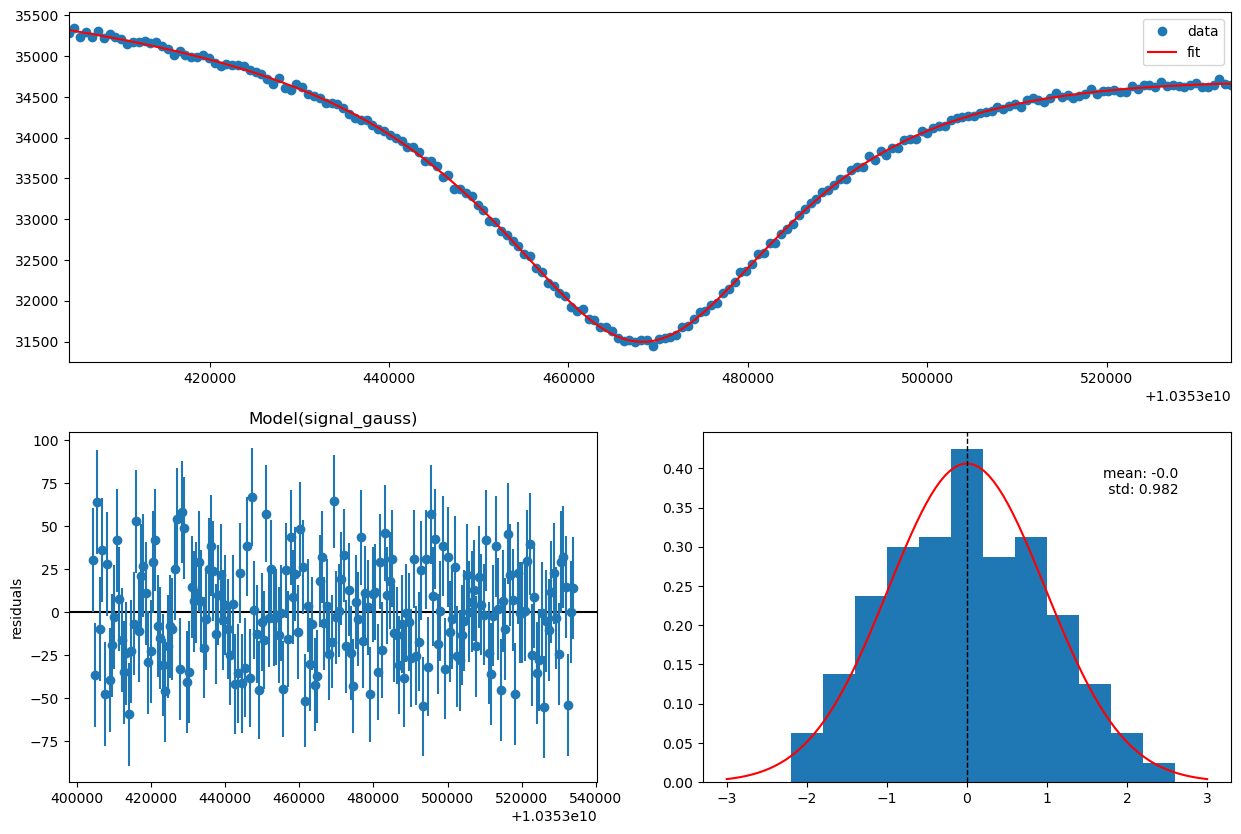

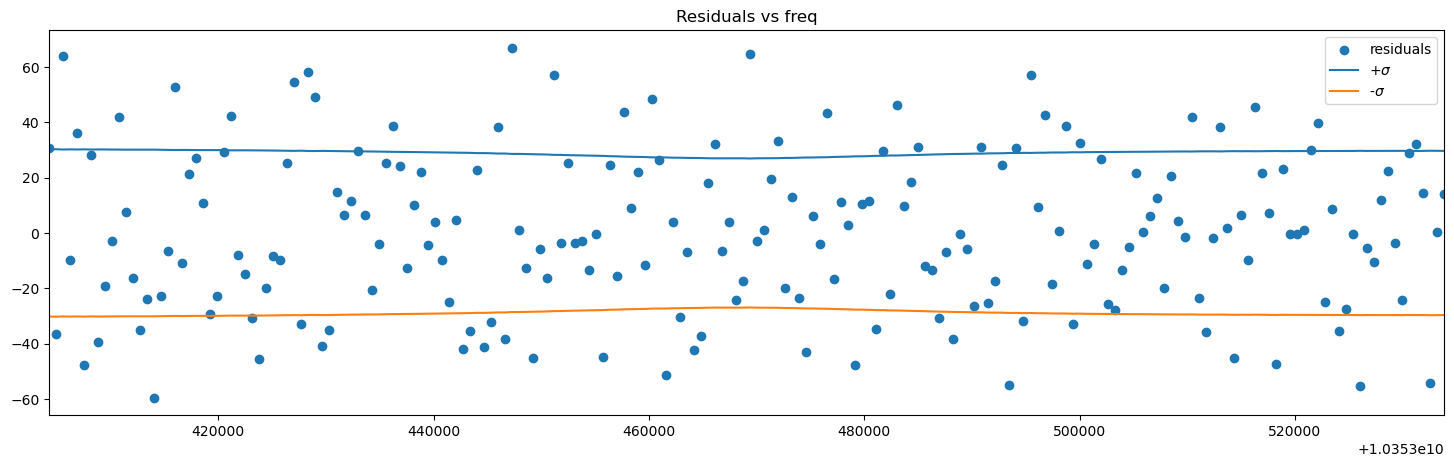

In [8]:
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=True, mu_init=0.1)
fits.plot_fit(freq, fft, weights, res_sig)

## Test Statistics

Compute likelihood ratio over observed data.

In [10]:
q0_obs = stat.lh_ratio(fft, res_bkg.best_fit, res_sig.best_fit)
q0_obs

0.1079270244745203

### Significance

Compute significance as a function of the center of the signal.

In [12]:
z_tot, _ = stat.stat_test(run=395, x_0=freq, mu_fix=np.array([]),
                          signal=fits.signal_gauss, n_toy=500,
                          calc_z=True, calc_CI=False, draw=False, verbose=False, path='db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


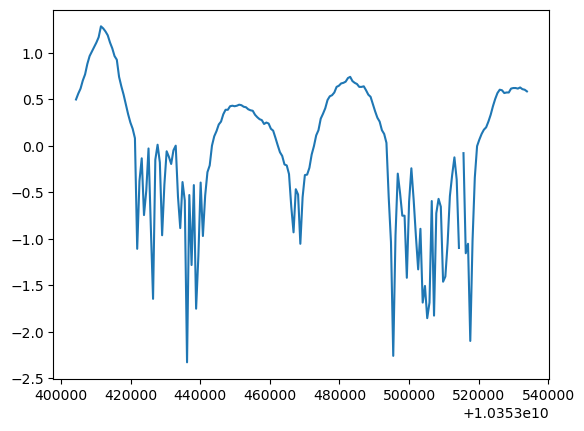

In [13]:
plt.plot(freq, z_tot)

In [14]:
np.max(z_tot), freq[np.argmax(z_tot)]

(1.2815515655446004, 10353411458.333334)

Here are some example of the likelihood ratio distribution for different $x_0$: the maximum value of $\hat{\mu}$, the center of the cavity and a secondary peak of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


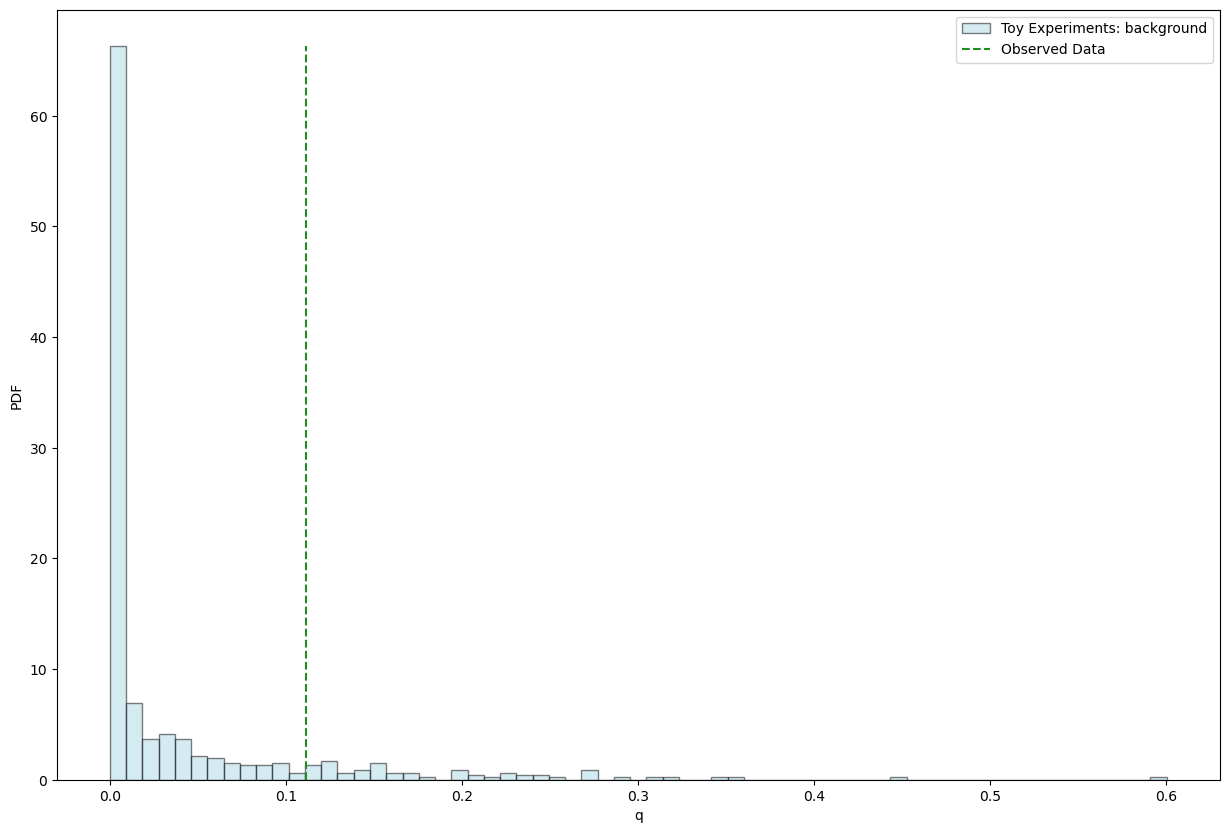

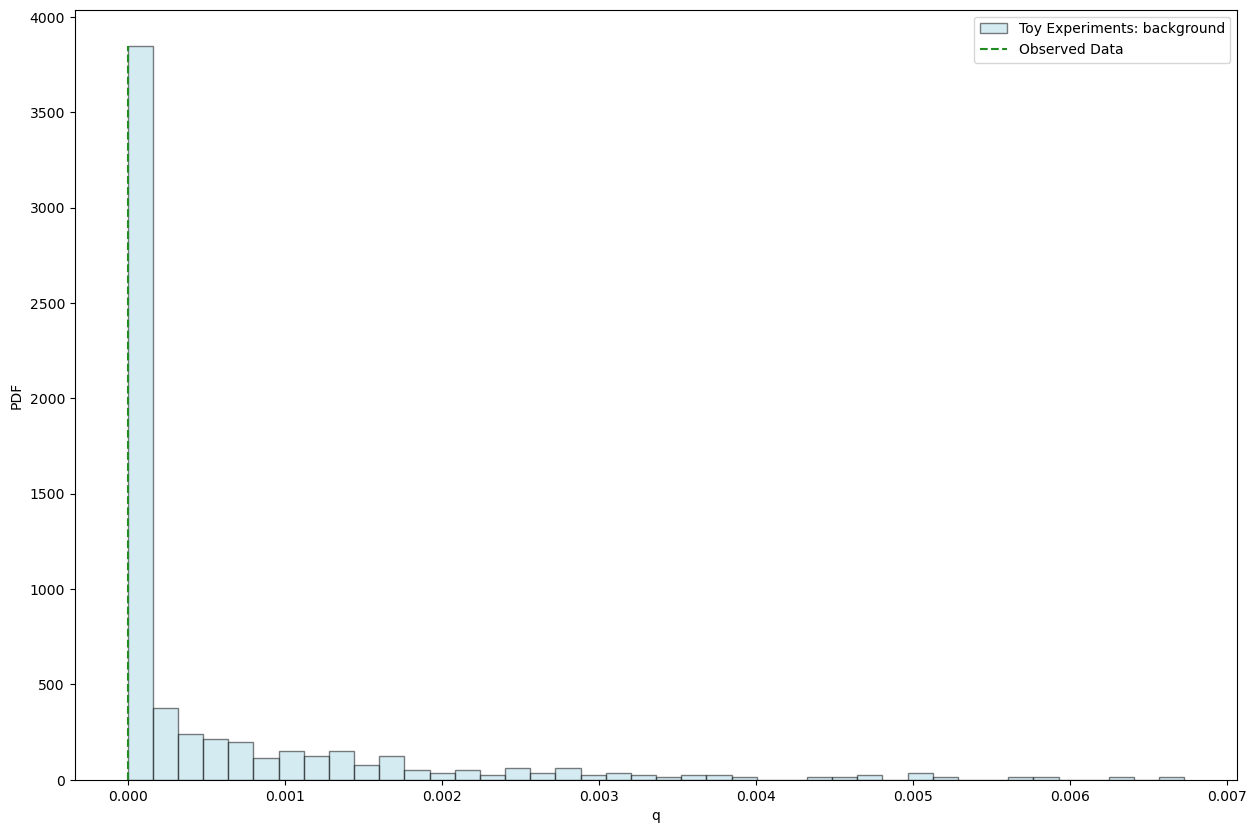

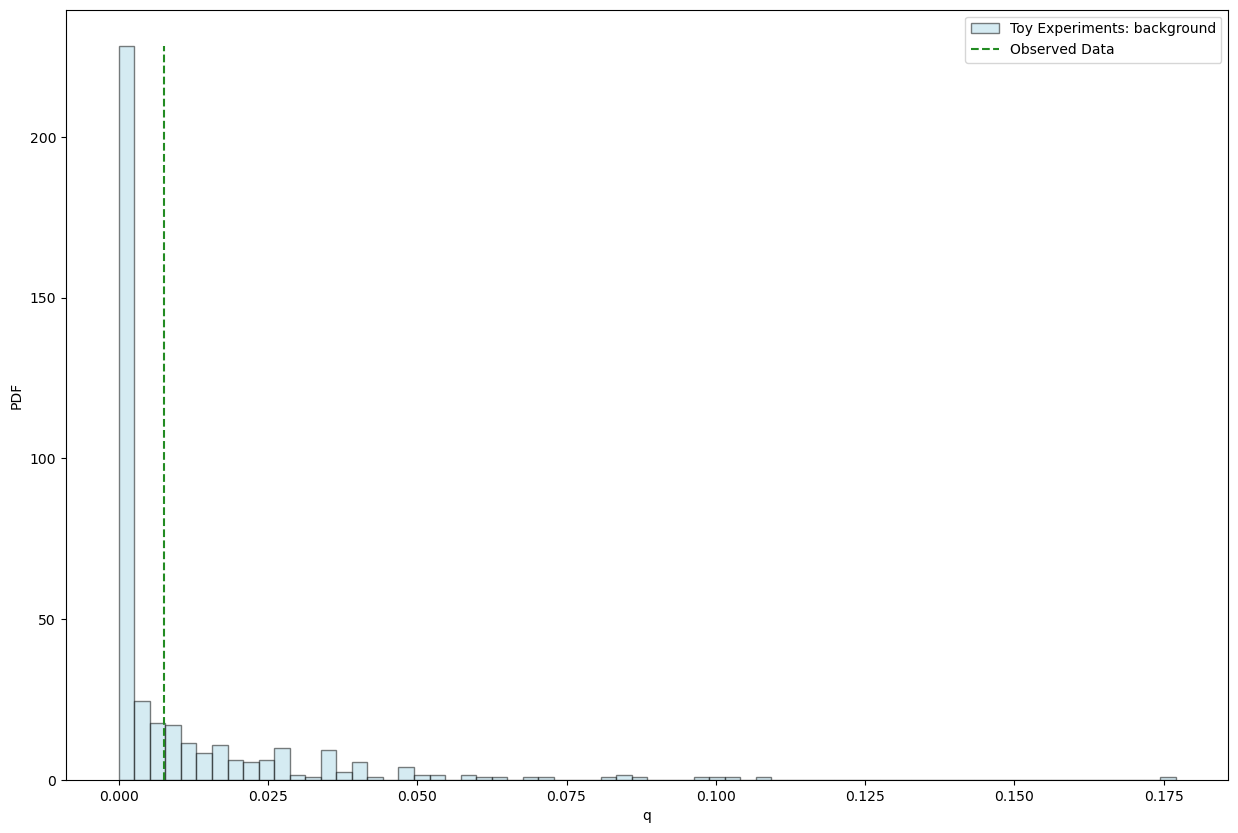

In [16]:
z, _ = stat.stat_test(run=395, x_0=[10353412109.375, center, freq[116]], mu_fix=np.array([]),
                      signal=fits.signal_gauss, n_toy=500,
                      calc_z=True, calc_CI=False, draw=True, verbose=False, path='db/')

### Confidence Interval

Compute $\mu^{95\% CL}$

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


Statistics.ipynb:33: RuntimeWarning: divide by zero encountered in double_scalars
  "## Significance Test"


Mu:  19.8604731 
p_mu = 0.658   p_b = 0.0   ratio = inf 



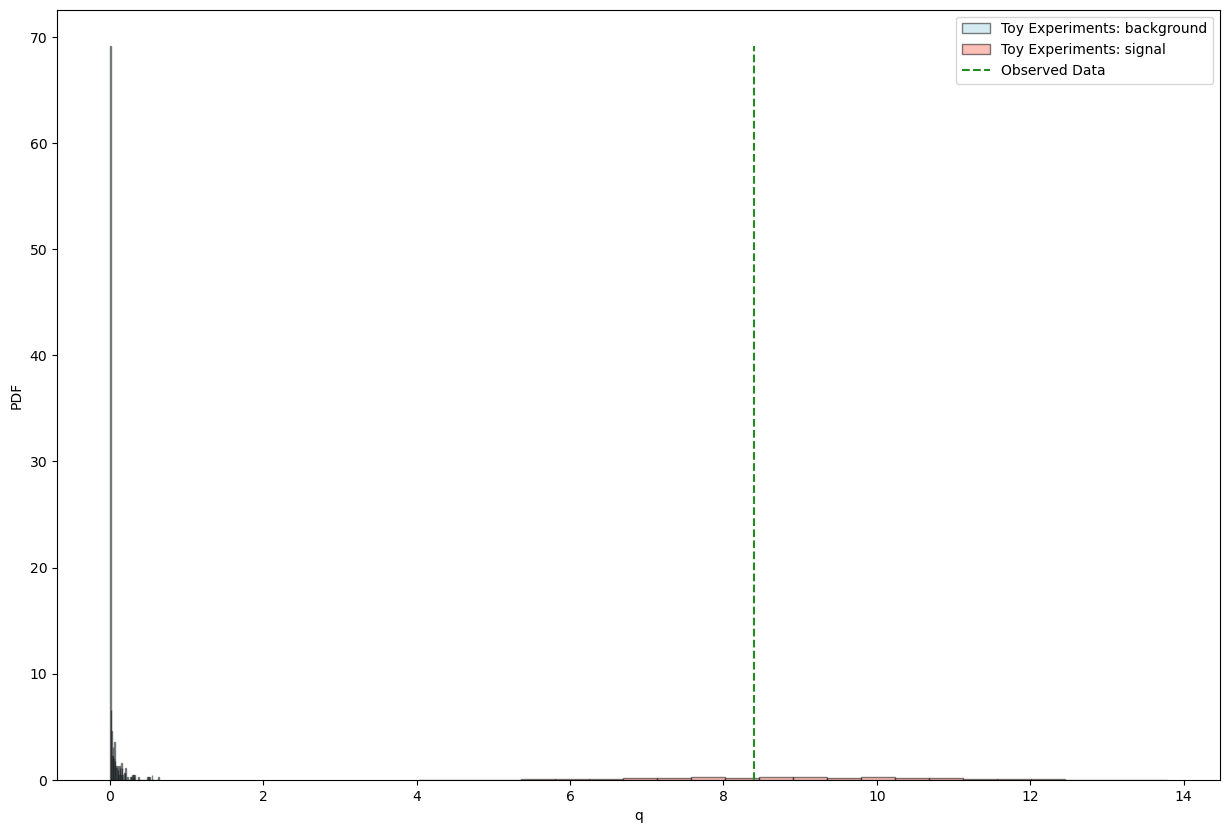

Mu:  9.93023655 
p_mu = 0.77   p_b = 0.0   ratio = inf 



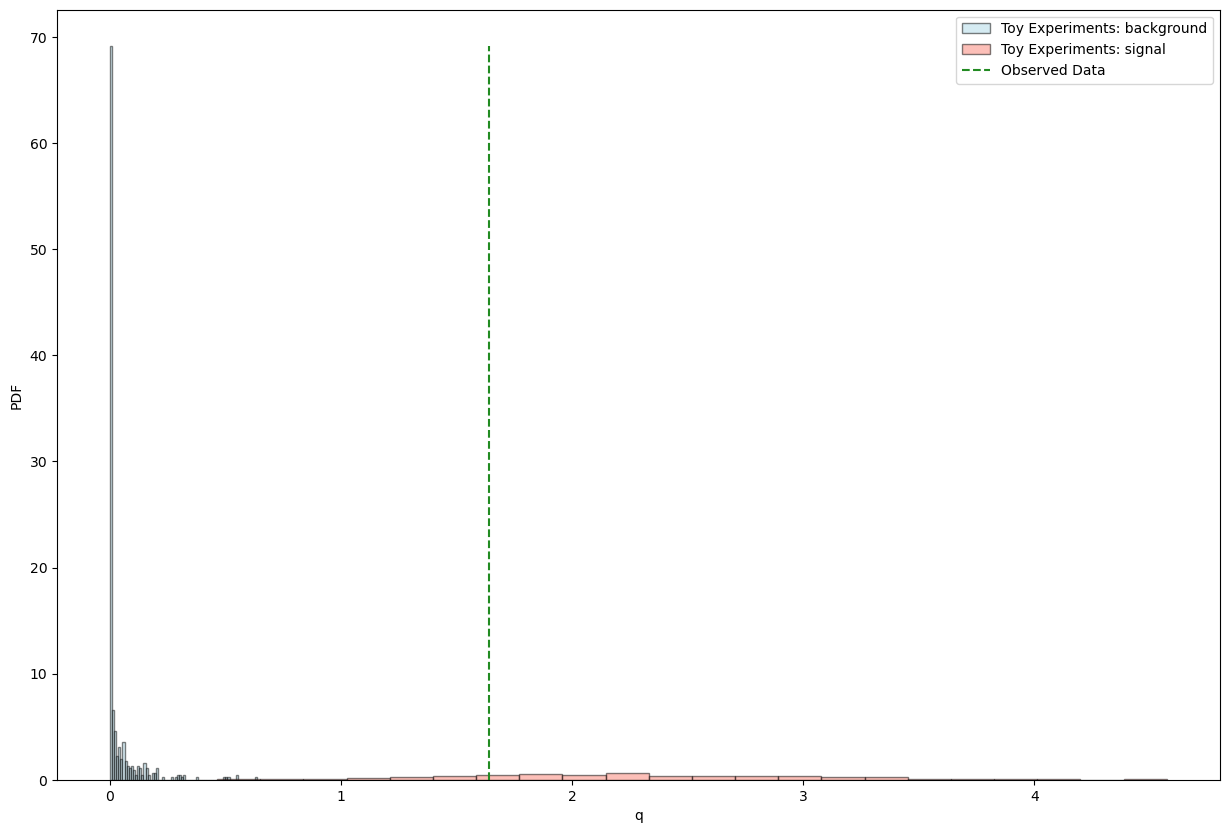

Mu:  3.97209462 
p_mu = 0.822   p_b = 0.124   ratio = 6.629032258064516 



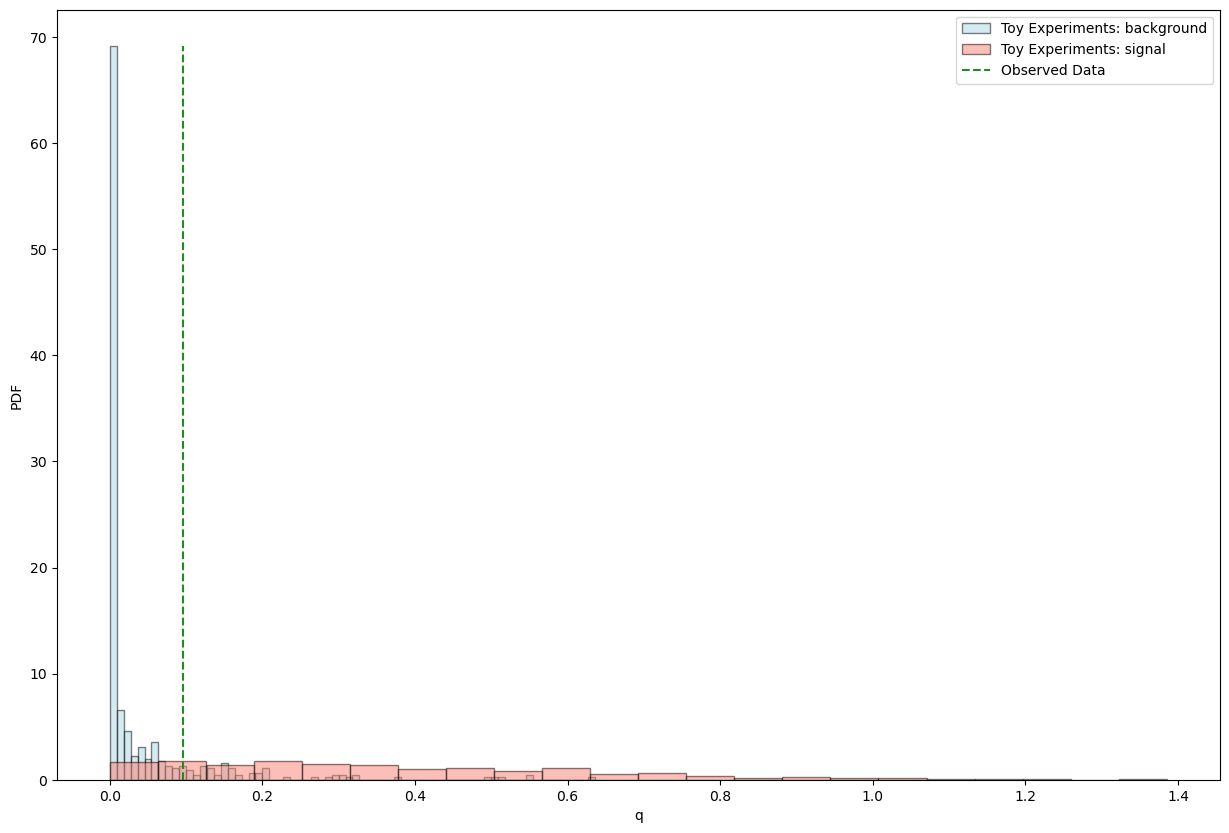

Mu:  1.98604731 
p_mu = 0.988   p_b = 0.516   ratio = 1.9147286821705425 



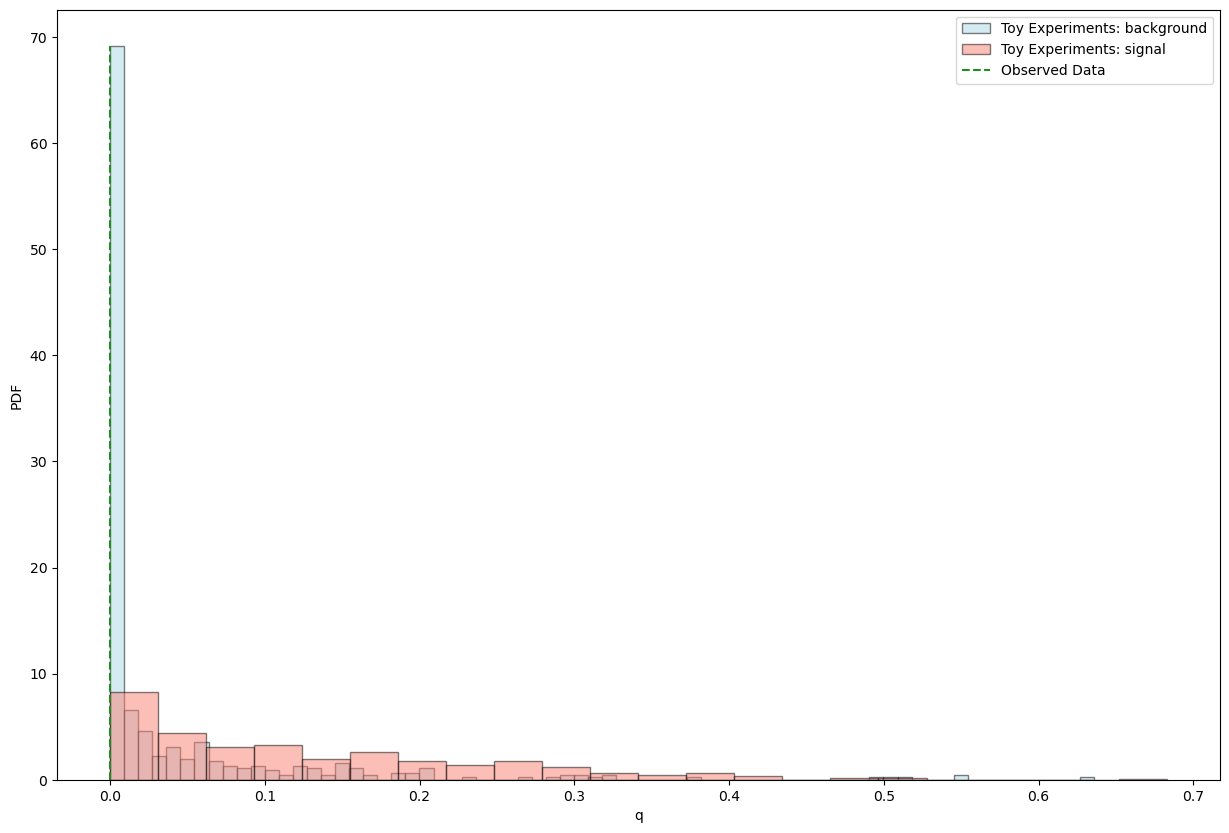

Mu:  0.993023655 
p_mu = 0.582   p_b = 0.26   ratio = 2.238461538461538 



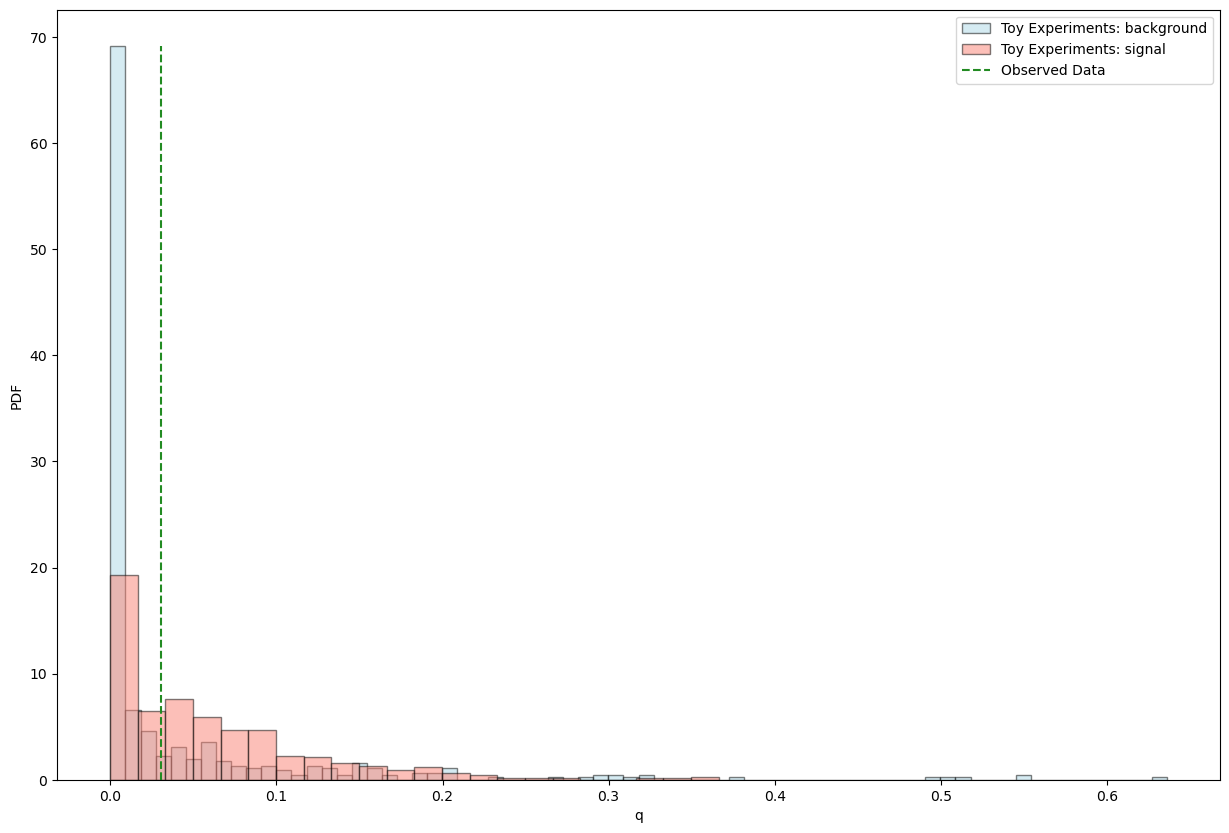

Mu:  0.198604731 
p_mu = 0.11   p_b = 0.134   ratio = 0.8208955223880596 



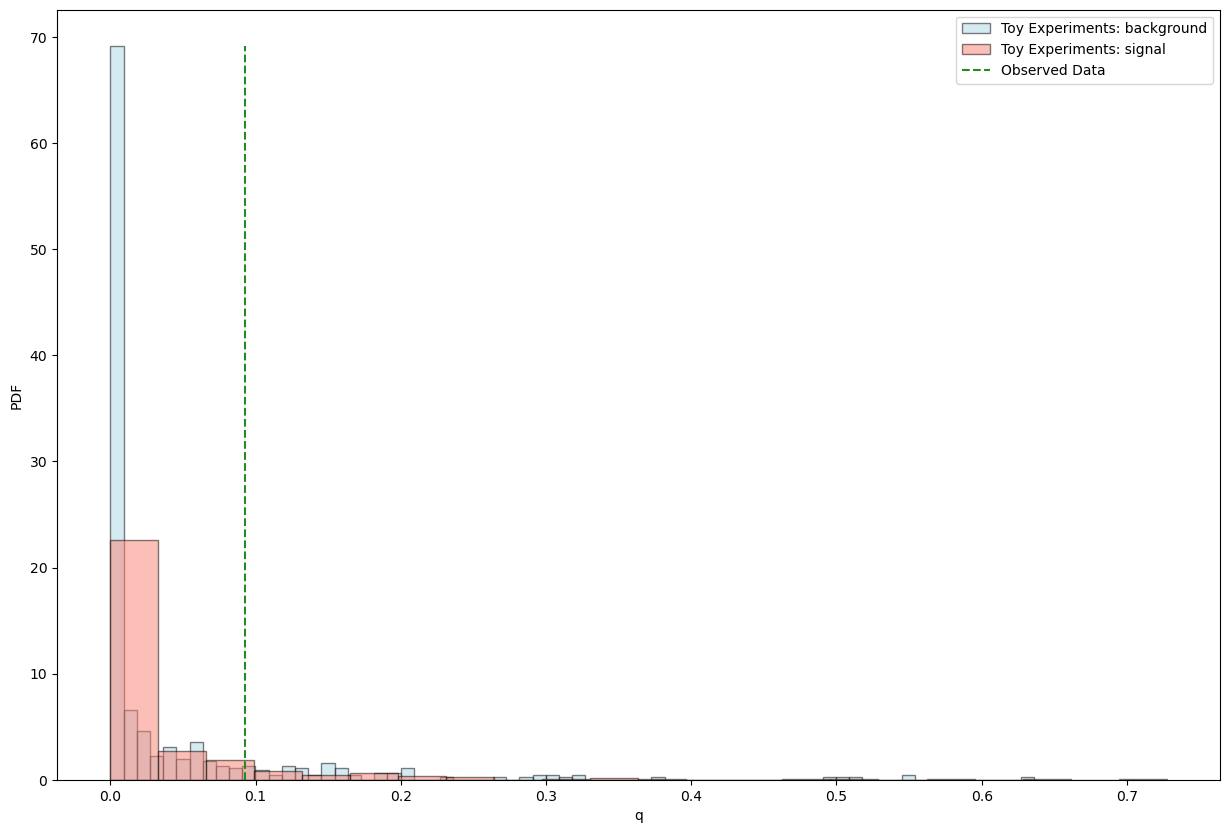

Mu:  0.0198604731 
p_mu = 0.122   p_b = 0.114   ratio = 1.0701754385964912 



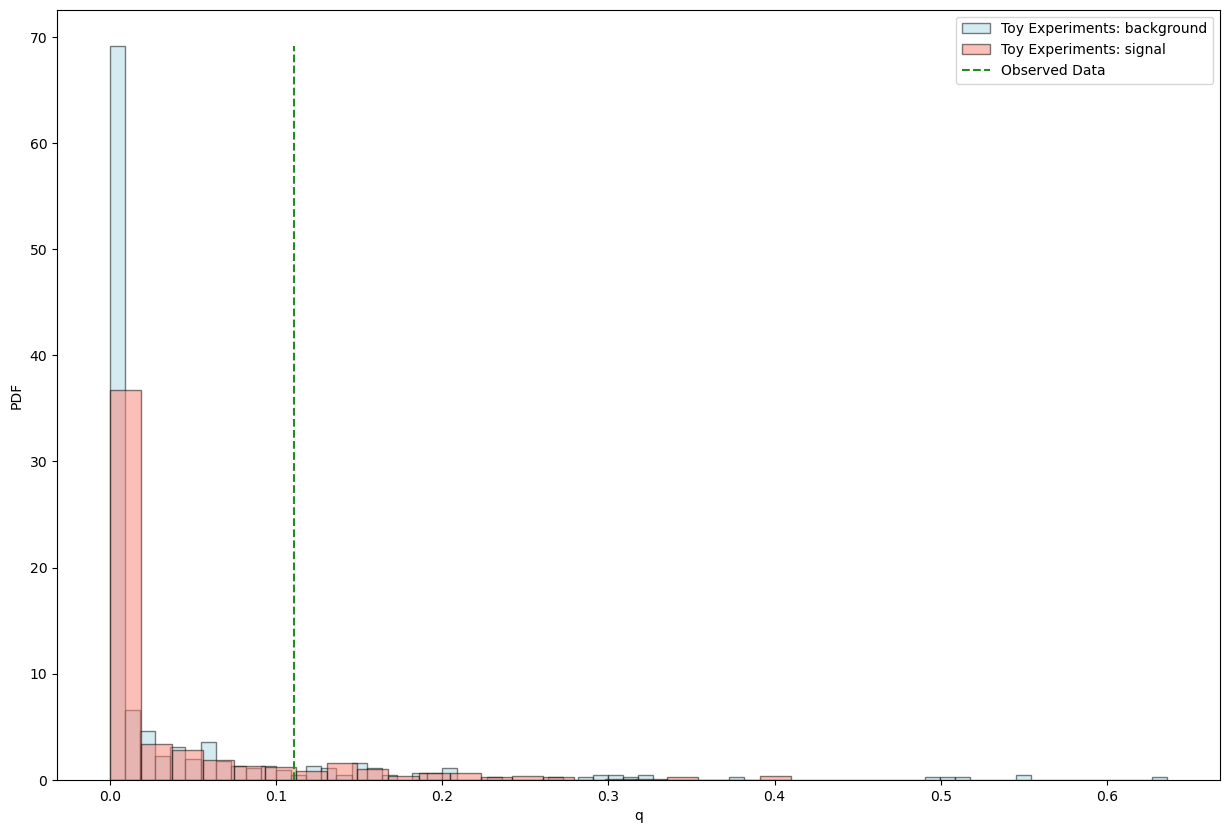

In [20]:
mu_hat = 1.98604731
mu_fix = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01])*mu_hat

_, muCI = stat.stat_test(run=395, x_0=[10353411458.333334], mu_fix=mu_fix,
                         signal=fits.signal_gauss, n_toy=500,
                         calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')